# <center> Projet Analyse de données </center>

---

## Dataset originel

**source :**

- [Pizza Price Data](https://www.kaggle.com/knightbearr/pizza-price-prediction-real-data)

---

## Importations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as msql
from mysql.connector import Error

---

## Visualisation du dataset

In [2]:
dataset = pd.read_csv('pizza_data.csv')
dataset

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99
...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",$23.85
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",$11.80
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",$14.95
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",$18.65


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     371 non-null    object
 1   Pizza Name  371 non-null    object
 2   Type        371 non-null    object
 3   Size        371 non-null    object
 4   Price       371 non-null    object
dtypes: object(5)
memory usage: 14.6+ KB


In [5]:
# Description du dataset

dataset.describe()

,Company,Pizza Name,Type,Size,Price
count,371,371,371,371,371
unique,4,247,9,11,56
top,Godfather's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,Large,$15.49
freq,133,4,186,111,50


In [6]:
# Taille 

dataset.shape

(371, 5)

## Visualisation des Types de pizzas

<AxesSubplot:xlabel='Type', ylabel='count'>

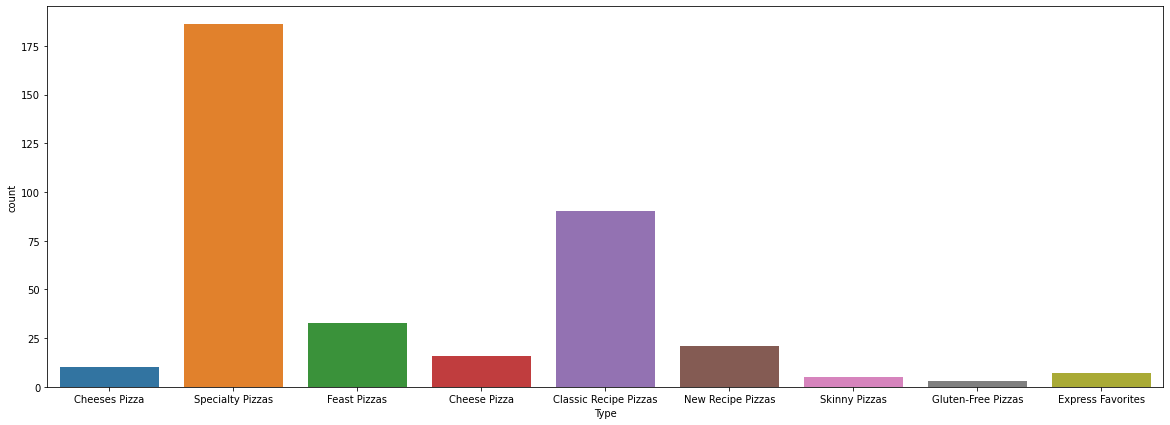

In [7]:
plt.figure(figsize=(20,7))
sns.countplot(dataset['Type'])

## Visualisation des Prix

<AxesSubplot:xlabel='Price', ylabel='count'>

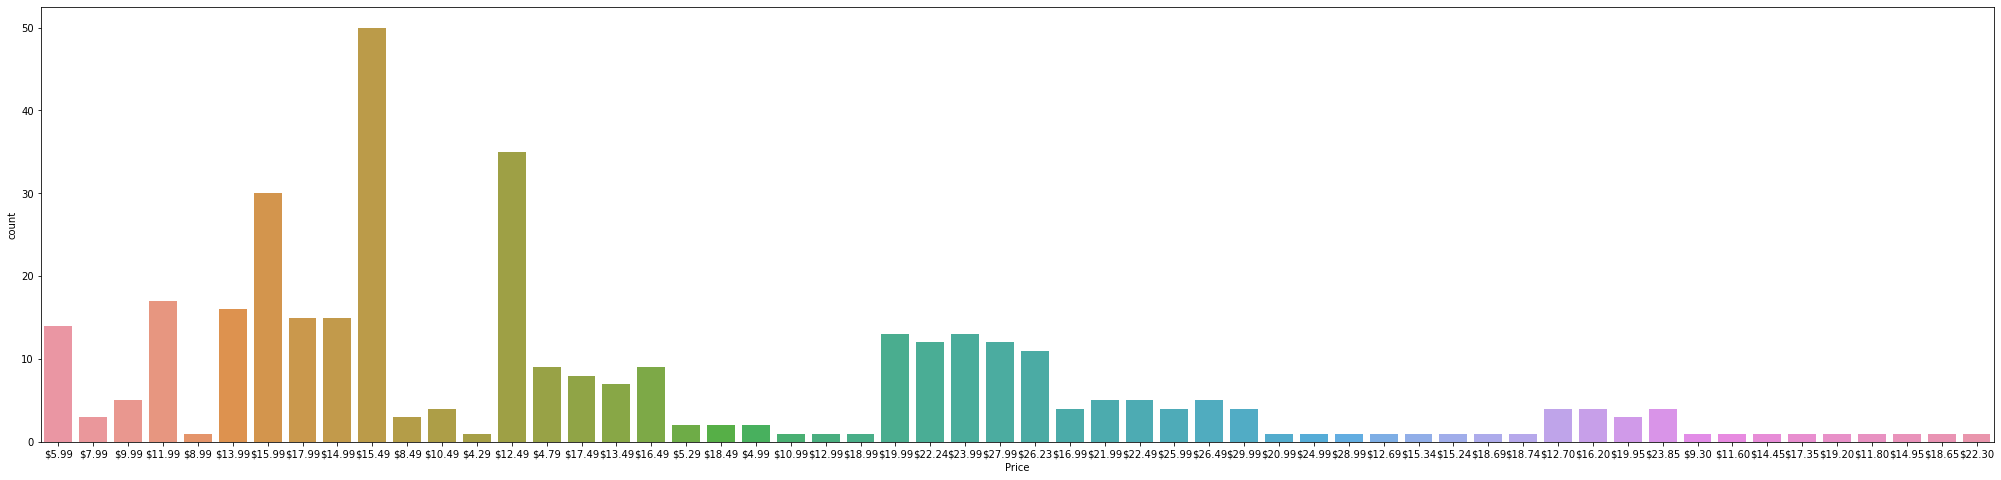

In [8]:
plt.figure(figsize=(35,8))
sns.countplot(dataset['Price'])

## Conversion de la colonne Price en float

In [7]:
# On remplace les '$'

dataset['Price'] = dataset['Price'].str.replace('$', "")

<ipython-input-7-70e5ab4c9422>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Price'] = dataset['Price'].str.replace('$', "")


In [8]:
# On transforme la colonne 
dataset['Price']  = pd.to_numeric(dataset['Price'] ,errors='coerce')

In [9]:
# Prix minimal
dataset['Price'].min()

4.29

In [10]:
# Prix maximal
dataset['Price'].max()

29.99

In [11]:
# Le type a bien été changé
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     371 non-null    object 
 1   Pizza Name  371 non-null    object 
 2   Type        371 non-null    object 
 3   Size        371 non-null    object 
 4   Price       371 non-null    float64
dtypes: float64(1), object(4)
memory usage: 14.6+ KB


In [12]:
dataset['Price'].unique()

array([ 5.99,  7.99,  9.99, 11.99,  8.99, 13.99, 15.99, 17.99, 14.99,
       15.49,  8.49, 10.49,  4.29, 12.49,  4.79, 17.49, 13.49, 16.49,
        5.29, 18.49,  4.99, 10.99, 12.99, 18.99, 19.99, 22.24, 23.99,
       27.99, 26.23, 16.99, 21.99, 22.49, 25.99, 26.49, 29.99, 20.99,
       24.99, 28.99, 12.69, 15.34, 15.24, 18.69, 18.74, 12.7 , 16.2 ,
       19.95, 23.85,  9.3 , 11.6 , 14.45, 17.35, 19.2 , 11.8 , 14.95,
       18.65, 22.3 ])

In [13]:
# il y a 56 prix différents
dataset.Price.nunique()

56

In [14]:
# On calcule la moyenne des prix
dataset.Price.mean()

16.319326145552452

Le prix moyen d'une pizza est de 16$.

### Visualisation de la nouvelle colonne 'Price'

<AxesSubplot:xlabel='Price', ylabel='count'>

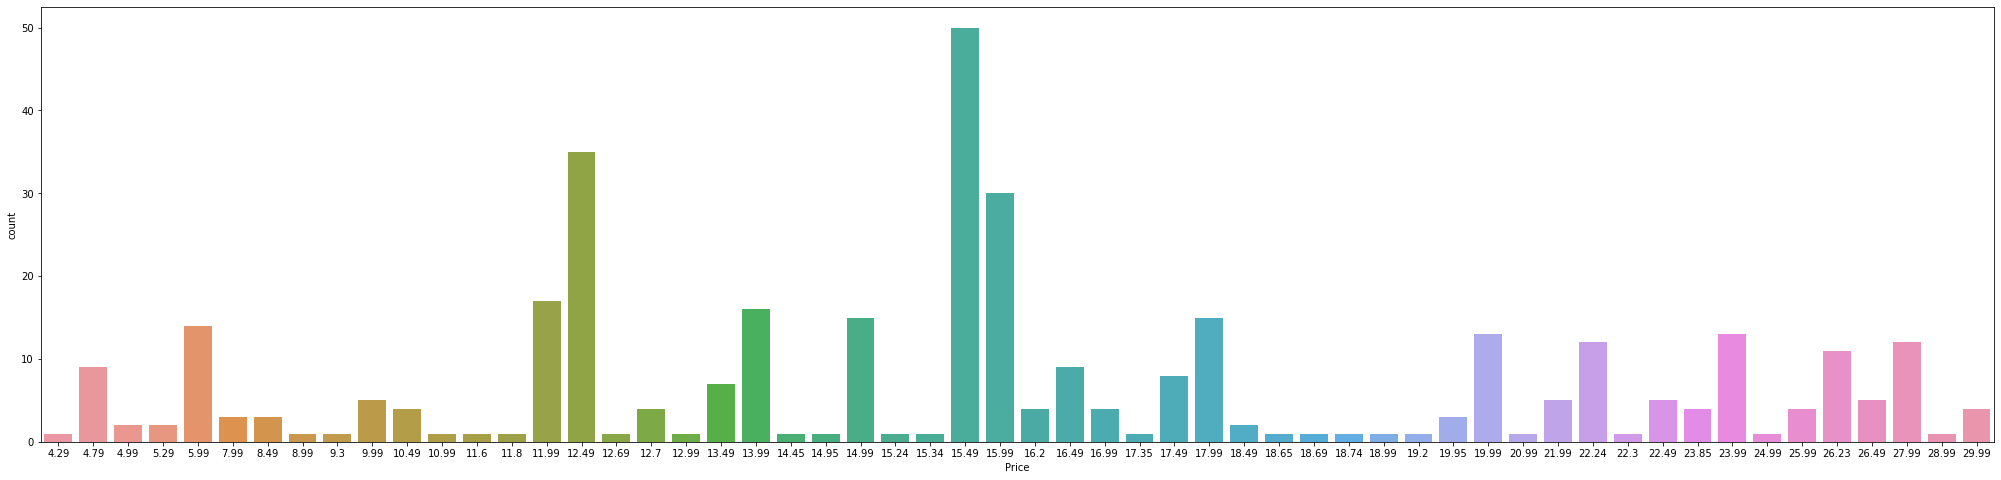

In [17]:
plt.figure(figsize=(35,8))
sns.countplot(dataset['Price'])

## Visualisation des Compagnies

<AxesSubplot:xlabel='Company', ylabel='count'>

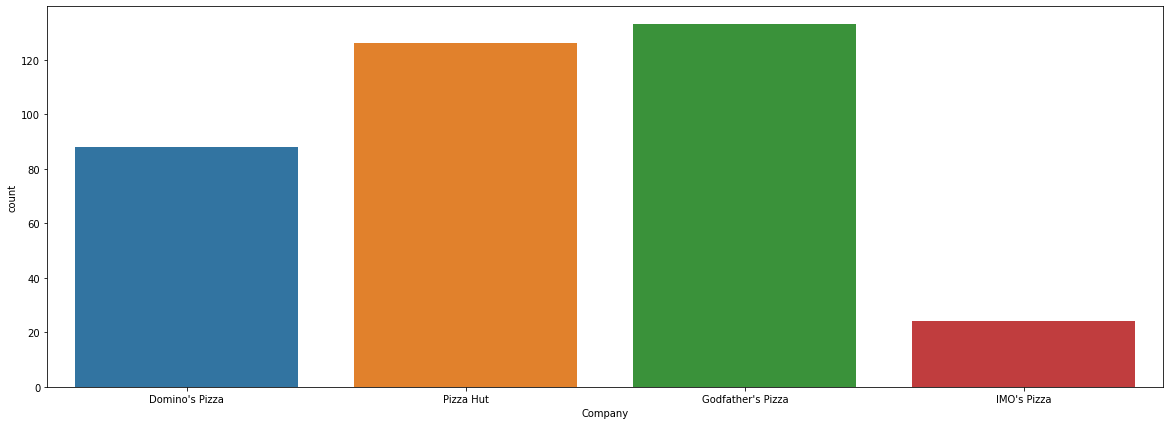

In [11]:
plt.figure(figsize=(20,7))
sns.countplot(dataset['Company'])

## Visualisation des Noms des pizzas

<AxesSubplot:xlabel='Pizza Name', ylabel='count'>

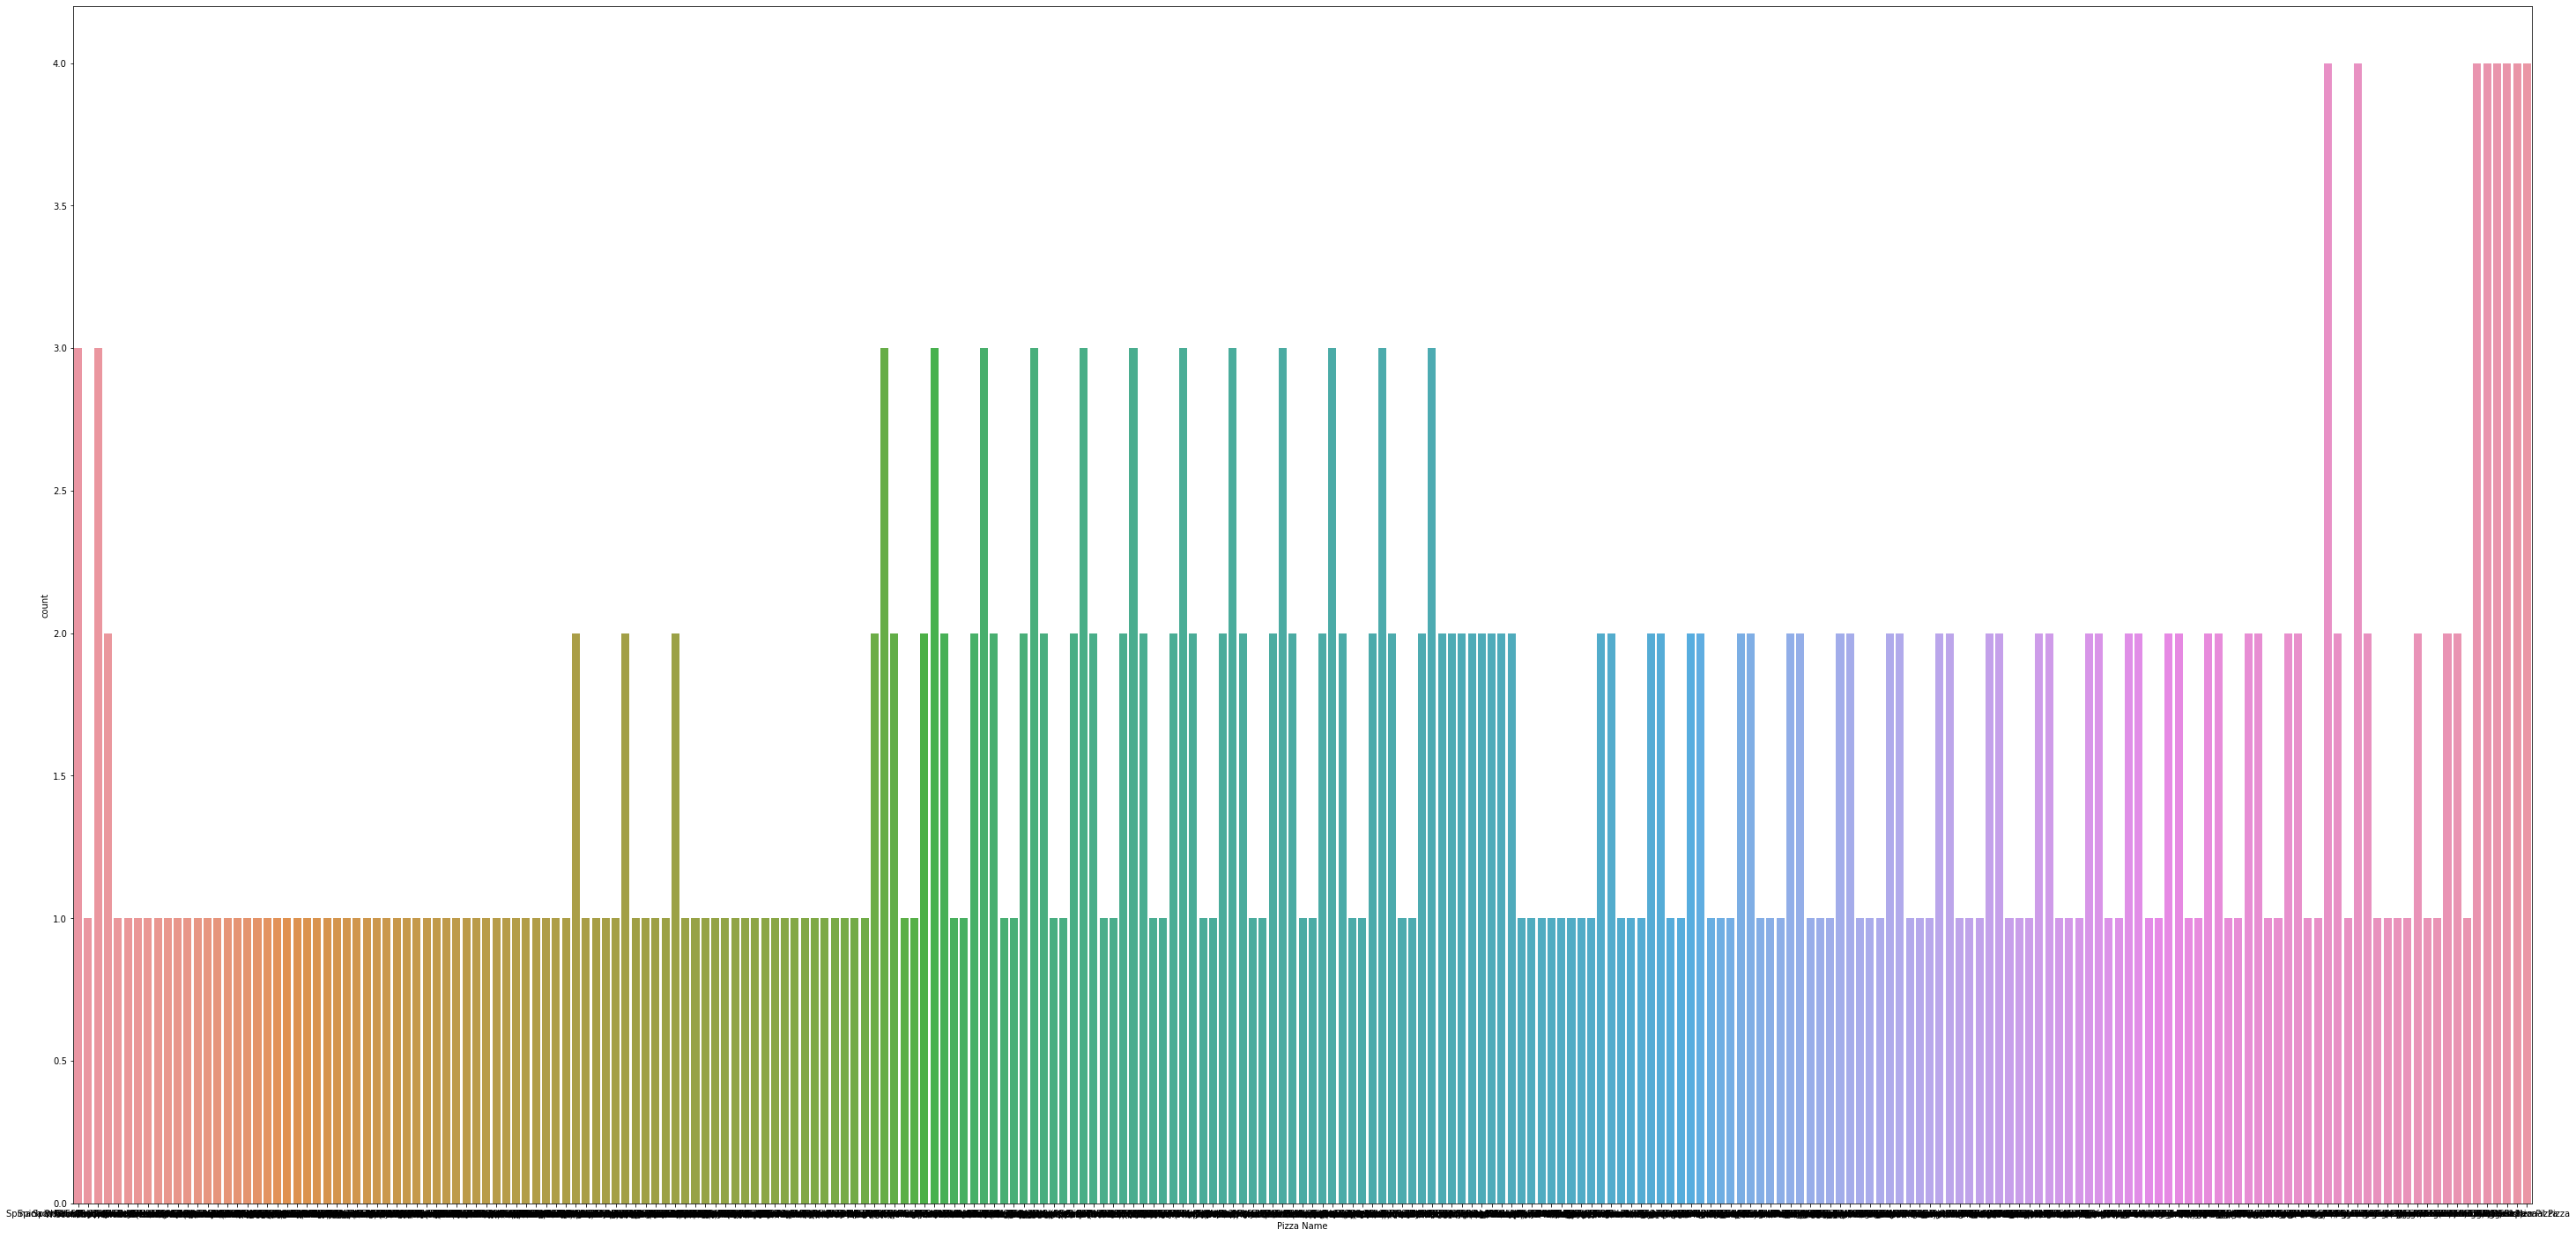

In [33]:
plt.figure(figsize=(50,25))
sns.countplot(dataset['Pizza Name'])

## Les noms des Pizzas

Il y a 247 noms de pizzas différents.

In [22]:
# Voir la liste des noms

dataset['Pizza Name'].unique()

array(['Hand Tossed', 'Handmade Pan', 'Crunchy Thin Crust',
       'Brooklyn Style', 'Gluten Free Crust',
       'Spinach & Feta (Hand Tossed or Thin Crust)',
       'Spinach & Feta (Hand Tossed, Handmade Pan or Thin Crust)',
       'Spinach & Feta (Hand Tossed, Thin Crust or Brooklyn Style)',
       'Spinach & Feta (Brooklyn Style)',
       'Spinach & Feta (Gluten Free Crust)',
       'Wisconsin 6 Cheese (Hand Tossed or Thin Crust)',
       'Wisconsin 6 Cheese (Hand Tossed, Handmade Pan or Thin Crust)',
       'Wisconsin 6 Cheese (Hand Tossed, Thin Crust or Brooklyn Style)',
       'Wisconsin 6 Cheese (Brooklyn Style)',
       'Wisconsin 6 Cheese (Gluten Free Crust)',
       'Honolulu Hawaiian (Hand Tossed or Thin Crust)',
       'Honolulu Hawaiian (Hand Tossed, Handmade Pan or Thin Crust)',
       'Honolulu Hawaiian (Hand Tossed, Thin Crust or Brooklyn Style)',
       'Honolulu Hawaiian (Brooklyn Style)',
       'Honolulu Hawaiian (Gluten Free Crust)',
       'Philly Cheese Steak (Ha

In [15]:
# Total des noms de pizzas différents. ( voir également dataset.describe() )

dataset['Pizza Name'].nunique()

247

---

## Enregistrement des modifications et création d'un nouveau fichier csv

In [65]:
df = dataset.to_csv('df_pizza.csv', index=False)

In [3]:
df = pd.read_csv('df_pizza.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     371 non-null    object 
 1   Pizza Name  371 non-null    object 
 2   Type        371 non-null    object 
 3   Size        371 non-null    object 
 4   Price       371 non-null    float64
dtypes: float64(1), object(4)
memory usage: 14.6+ KB


In [72]:
df.head()

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",5.99


---

# <center>Modification du csv</center>

## Chargement du csv

In [268]:
# il faut charger ici le csv où la colonne price a été modifiée en float.
df = pd.read_csv('df_pizza.csv')
df

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",5.99
...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",23.85
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",11.80
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",14.95
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",18.65


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     371 non-null    object 
 1   Pizza Name  371 non-null    object 
 2   Type        371 non-null    object 
 3   Size        371 non-null    object 
 4   Price       371 non-null    float64
dtypes: float64(1), object(4)
memory usage: 14.6+ KB


---

Ajout de 3 colonnes au fichier originel : id_company, id_size, id_type.

## Id_company

In [270]:
data = df

In [271]:
# On remplace "Domino's Pizza" par des 1
data = data.replace("Domino's Pizza", 1)


# On remplace "Pizza Hut" par des 2
data = data.replace("Pizza Hut", 2)


# On remplace "Godfather's Pizza" par des 3
data = data.replace("Godfather's Pizza", 3)

# On remplace "IMO's Pizza" par des 4
data = data.replace("IMO's Pizza", 4)


print(data)

     Company           Pizza Name              Type           Size  Price
0          1          Hand Tossed     Cheeses Pizza    Small (10")   5.99
1          1          Hand Tossed     Cheeses Pizza   Medium (12")   7.99
2          1          Hand Tossed     Cheeses Pizza    Large (14")   9.99
3          1         Handmade Pan     Cheeses Pizza   Medium (12")   7.99
4          1   Crunchy Thin Crust     Cheeses Pizza    Small (10")   5.99
..       ...                  ...               ...            ...    ...
366        4    BBQ Chicken Pizza  Specialty Pizzas  X Large (16")  23.85
367        4  Egg-Ceptional Pizza  Specialty Pizzas    Small (10")  11.80
368        4  Egg-Ceptional Pizza  Specialty Pizzas   Medium (12")  14.95
369        4  Egg-Ceptional Pizza  Specialty Pizzas    Large (14")  18.65
370        4  Egg-Ceptional Pizza  Specialty Pizzas  X Large (16")  22.30

[371 rows x 5 columns]


In [272]:
# Création d'une liste qui récupère chaque id_company

liste = []

for element in data['Company']:
    liste.append(element)

print(liste)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [273]:
# Création d'un nouveau df avec une colonne qui récupère tous les éléments de la liste qui contient les id_company 

df_2 = pd.DataFrame({"id_company": liste })

In [274]:
# Conversion de la nouvelle colonne en float

df_2 = df_2.astype(float)

In [275]:
# le type de la colonne a bien été changé

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_company  371 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [276]:
# On ajoute la nouvelle colonne id_company à notre dataframe de base
test = pd.concat([data, df_2], axis=1)

In [277]:
# On peut visualiser notre nouveau dataframe 

test

,Company,Pizza Name,Type,Size,Price,id_company
0,1,Hand Tossed,Cheeses Pizza,"Small (10"")",5.99,1.0
1,1,Hand Tossed,Cheeses Pizza,"Medium (12"")",7.99,1.0
2,1,Hand Tossed,Cheeses Pizza,"Large (14"")",9.99,1.0
3,1,Handmade Pan,Cheeses Pizza,"Medium (12"")",7.99,1.0
4,1,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",5.99,1.0
...,...,...,...,...,...,...
366,4,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",23.85,4.0
367,4,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",11.80,4.0
368,4,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",14.95,4.0
369,4,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",18.65,4.0


## Id_type

In [278]:
data=test

# On remplace "Cheeses Pizza" par des 1               
data = data.replace("Cheeses Pizza", 1)

# On remplace "Specialty Pizzas" par des 2
data = data.replace("Specialty Pizzas", 2)

# On remplace "Feast Pizzas" par des 3
data = data.replace("Feast Pizzas", 3)

# On remplace "Cheese Pizza" par des 4
data = data.replace("Cheese Pizza", 4)

# On remplace "Classic Recipe Pizzas" par des 5
data = data.replace("Classic Recipe Pizzas", 5)

# On remplace "New Recipe Pizzas" par des 6
data = data.replace("New Recipe Pizzas", 6)

# On remplace "Skinny Pizzas" par des 7
data = data.replace("Skinny Pizzas", 7)

# On remplace "Gluten-Free Pizzas" par des 8
data = data.replace("Gluten-Free Pizzas", 8)

# On remplace "Express Favorites" par des 9
data = data.replace("Express Favorites", 9)

In [279]:
print(data)

     Company           Pizza Name  Type           Size  Price  id_company
0          1          Hand Tossed     1    Small (10")   5.99         1.0
1          1          Hand Tossed     1   Medium (12")   7.99         1.0
2          1          Hand Tossed     1    Large (14")   9.99         1.0
3          1         Handmade Pan     1   Medium (12")   7.99         1.0
4          1   Crunchy Thin Crust     1    Small (10")   5.99         1.0
..       ...                  ...   ...            ...    ...         ...
366        4    BBQ Chicken Pizza     2  X Large (16")  23.85         4.0
367        4  Egg-Ceptional Pizza     2    Small (10")  11.80         4.0
368        4  Egg-Ceptional Pizza     2   Medium (12")  14.95         4.0
369        4  Egg-Ceptional Pizza     2    Large (14")  18.65         4.0
370        4  Egg-Ceptional Pizza     2  X Large (16")  22.30         4.0

[371 rows x 6 columns]


In [280]:
# Création d'une liste qui récupère chaque id_type

liste = []

for element in data['Type']:
    liste.append(element)

print(liste)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [281]:
# Création d'un nouveau df avec une colonne qui récupère tous les éléments de la liste qui contient les id_type

df_2 = pd.DataFrame({"id_type": liste })

In [282]:
# Conversion de la nouvelle colonne en float

df_2 = df_2.astype(float)

In [283]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_type  371 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [284]:
# On ajoute la nouvelle colonne id_company à notre dataframe de base
test = pd.concat([data, df_2], axis=1)

In [285]:
# On peut visualiser de nouveau le dataframe 'test'
test

,Company,Pizza Name,Type,Size,Price,id_company,id_type
0,1,Hand Tossed,1,"Small (10"")",5.99,1.0,1.0
1,1,Hand Tossed,1,"Medium (12"")",7.99,1.0,1.0
2,1,Hand Tossed,1,"Large (14"")",9.99,1.0,1.0
3,1,Handmade Pan,1,"Medium (12"")",7.99,1.0,1.0
4,1,Crunchy Thin Crust,1,"Small (10"")",5.99,1.0,1.0
...,...,...,...,...,...,...,...
366,4,BBQ Chicken Pizza,2,"X Large (16"")",23.85,4.0,2.0
367,4,Egg-Ceptional Pizza,2,"Small (10"")",11.80,4.0,2.0
368,4,Egg-Ceptional Pizza,2,"Medium (12"")",14.95,4.0,2.0
369,4,Egg-Ceptional Pizza,2,"Large (14"")",18.65,4.0,2.0


## Id_size

In [286]:
data=test

# On remplace 'Small (10")' par des 1               
data = data.replace('Small (10")', 1)

# On remplace 'Medium (12")' par des 2
data = data.replace('Medium (12")', 2)

# On remplace 'Large (14")' par des 3
data = data.replace('Large (14")', 3)

# On remplace "X-Large (16")" par des 4
data = data.replace('X-Large (16")', 4)

# On remplace 'Medium' par des 5
data = data.replace('Medium', 5)

# On remplace 'Large' par des 6
data = data.replace('Large', 6)

# On remplace 'Personal' par des 7
data = data.replace('Personal', 7)

# On remplace 'Small' par des 8
data = data.replace('Small', 8)

# On remplace 'Mini' par des 9
data = data.replace('Mini', 9)

# On remplace 'Jumbo' par des 10              
data = data.replace('Jumbo', 10)

# On remplace 'X Large (16")' par des 11               
data = data.replace('X Large (16")', 11)

In [287]:
# Création d'une liste qui récupère chaque id_size

liste = []

for element in data['Size']:
    liste.append(element)

print(liste)

[1, 2, 3, 2, 1, 2, 3, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 2, 3, 4, 1, 1, 2, 2, 3, 4, 1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 8, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 8, 5, 5, 6, 6, 10, 8, 5, 5, 6, 6, 10, 8, 5, 5, 6, 6, 10, 8, 5, 5, 6, 6, 10, 8, 5, 5, 6, 6, 10, 9, 8, 5, 5, 6, 6, 10, 9,

In [288]:
# Création d'un nouveau df avec une colonne qui récupère tous les éléments de la liste qui contient les id_size 

df_2 = pd.DataFrame({"id_size": liste })

In [289]:
# Conversion de la nouvelle colonne en float

df_2 = df_2.astype(float)

In [290]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_size  371 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [291]:
# On ajoute la nouvelle colonne id_company à notre dataframe de base
test = pd.concat([data, df_2], axis=1)

In [292]:
# Visualisation du dataframe 'test'. Les 3 colonnes 'id' sont bien présentes.
test

,Company,Pizza Name,Type,Size,Price,id_company,id_type,id_size
0,1,Hand Tossed,1,1,5.99,1.0,1.0,1.0
1,1,Hand Tossed,1,2,7.99,1.0,1.0,2.0
2,1,Hand Tossed,1,3,9.99,1.0,1.0,3.0
3,1,Handmade Pan,1,2,7.99,1.0,1.0,2.0
4,1,Crunchy Thin Crust,1,1,5.99,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
366,4,BBQ Chicken Pizza,2,11,23.85,4.0,2.0,11.0
367,4,Egg-Ceptional Pizza,2,1,11.80,4.0,2.0,1.0
368,4,Egg-Ceptional Pizza,2,2,14.95,4.0,2.0,2.0
369,4,Egg-Ceptional Pizza,2,3,18.65,4.0,2.0,3.0


## <center>Sauvegarde</center>

In [293]:
# sauvegarde dans un nouveau csv
df = test.to_csv('pizza_id.csv', index=False)

In [294]:
# lecture du nouveau fichier
df = pd.read_csv('pizza_id.csv')

In [295]:
df

,Company,Pizza Name,Type,Size,Price,id_company,id_type,id_size
0,1,Hand Tossed,1,1,5.99,1.0,1.0,1.0
1,1,Hand Tossed,1,2,7.99,1.0,1.0,2.0
2,1,Hand Tossed,1,3,9.99,1.0,1.0,3.0
3,1,Handmade Pan,1,2,7.99,1.0,1.0,2.0
4,1,Crunchy Thin Crust,1,1,5.99,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
366,4,BBQ Chicken Pizza,2,11,23.85,4.0,2.0,11.0
367,4,Egg-Ceptional Pizza,2,1,11.80,4.0,2.0,1.0
368,4,Egg-Ceptional Pizza,2,2,14.95,4.0,2.0,2.0
369,4,Egg-Ceptional Pizza,2,3,18.65,4.0,2.0,3.0


## Fusion dataframe

On ajoute nos trois colonnes 'id' à notre dataframe originel.

In [296]:
# On récupère les 3 colonnes des id
test = df[["id_company", "id_type", "id_size"]]
test

,id_company,id_type,id_size
0,1.0,1.0,1.0
1,1.0,1.0,2.0
2,1.0,1.0,3.0
3,1.0,1.0,2.0
4,1.0,1.0,1.0
...,...,...,...
366,4.0,2.0,11.0
367,4.0,2.0,1.0
368,4.0,2.0,2.0
369,4.0,2.0,3.0


In [298]:
# on charge notre dataset originel (avec modification de la colonne price en float)
df = pd.read_csv('df_pizza.csv')
df

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",5.99
...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",23.85
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",11.80
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",14.95
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",18.65


In [299]:
# on ajoute les 3 colonnes des id
df_final = pd.concat([df, test], axis=1)

In [300]:
# Notre dataframe est désormais complet.
df_final

,Company,Pizza Name,Type,Size,Price,id_company,id_type,id_size
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",5.99,1.0,1.0,1.0
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",7.99,1.0,1.0,2.0
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",9.99,1.0,1.0,3.0
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",7.99,1.0,1.0,2.0
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",5.99,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",23.85,4.0,2.0,11.0
367,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Small (10"")",11.80,4.0,2.0,1.0
368,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Medium (12"")",14.95,4.0,2.0,2.0
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",18.65,4.0,2.0,3.0


---

# <center> MCD </center>

![mcd](Capture_MCD.JPG)

---

## <center>Insertion des données dans la BDD</center>

## Bdd

In [302]:
# Création de la bdd

try:
    conn = msql.connect(host='localhost', user='root', port='8080', password='root')

    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute('''

CREATE DATABASE IF NOT EXISTS `Brief_pizza` DEFAULT CHARACTER SET utf8 COLLATE utf8_general_ci;
USE `Brief_pizza`;
DROP TABLE IF EXISTS `Brief_pizza`;

CREATE TABLE `PIZZA` (
  `id_pizza` INT(11) NOT NULL AUTO_INCREMENT,
  `nom_pizza` VARCHAR(100),
  `price` INT(11),
  `id_type` INT(11),
  `id_size` INT(11),
  `id_company` INT(11),  
  PRIMARY KEY (`id_pizza`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;


CREATE TABLE `COMPANY` (
  `id_company` INT(11) NOT NULL AUTO_INCREMENT,
  `nom_company` VARCHAR(42) NOT NULL,
  PRIMARY KEY (`id_company`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `SIZE` (
  `id_size` INT(11) NOT NULL AUTO_INCREMENT,
  `size_pizza` VARCHAR(42) NOT NULL,
  PRIMARY KEY (`id_size`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `TYPE` (
  `id_type` INT(11) NOT NULL AUTO_INCREMENT,
  `type_pizza` VARCHAR(42) NOT NULL,
  PRIMARY KEY (`id_type`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;


    ''')  
        print("La bdd a bien été créée")
except Error as e:
    print("Error while connecting to MySQL", e)

La bdd a bien été créée


## Company

In [303]:
# insertion table company

try:
    conn = msql.connect(host='localhost', port='8080', database='brief_pizza', user='root', password='root')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Connexion à la bdd: ", record)

        for i in df_final['Company'].unique():
            # %s = valeur insérée 
            sql = "INSERT INTO brief_pizza.company (nom_company) VALUES (%s)"
            cursor.execute(sql, (i,))
            # application des changements à la bdd
            conn.commit()
        print("Insertion data : OK")
except Error as e:
             print("Error while connecting to MySQL", e)

Connexion à la bdd:  ('brief_pizza',)
Insertion data : OK


## Size

In [304]:
# insertion table size

try:
    conn = msql.connect(host='localhost', port='8080', database='brief_pizza', user='root', password='root')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Connexion à la bdd: ", record)

        for i in df_final['Size'].unique():
            # %s = valeur insérée 
            sql = "INSERT INTO brief_pizza.size (size_pizza) VALUES (%s)"
            cursor.execute(sql, (i,))
            # application des changements à la bdd
            conn.commit()
        print("Insertion data : OK")
except Error as e:
             print("Error while connecting to MySQL", e)

Connexion à la bdd:  ('brief_pizza',)
Insertion data : OK


## Type

In [305]:
# insertion table type

try:
    conn = msql.connect(host='localhost', port='8080', database='brief_pizza', user='root', password='root')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Connexion à la bdd: ", record)

        for i in df_final['Type'].unique():
            # %s = valeur insérée 
            sql = "INSERT INTO brief_pizza.type (type_pizza) VALUES (%s)"
            cursor.execute(sql, (i,))
            # application des changements à la bdd
            conn.commit()
        print("Insertion data : OK")
except Error as e:
             print("Error while connecting to MySQL", e)

Connexion à la bdd:  ('brief_pizza',)
Insertion data : OK


## Pizza

In [306]:
# insertion table pizza

try:
    conn = msql.connect(host='localhost', port='8080', database='brief_pizza', user='root', password='root')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Connexion à la bdd: ", record)


        for index, row in df_final.iterrows():
            # %s = valeur insérée 
            sql = "INSERT INTO brief_pizza.pizza (nom_pizza, price, id_type, id_size, id_company) VALUES (%s,%s,%s,%s,%s)"
            cursor.execute(sql, (row['Pizza Name'], row['Price'], row['id_type'], row['id_size'], row['id_company']))
            # application des changements à la bdd
            conn.commit()
        print("Insertion data : OK")
except Error as e:
            print("Error while connecting to MySQL", e)

Connexion à la bdd:  ('brief_pizza',)
Insertion data : OK


## Ajout des clés étrangères

In [307]:
try:
    conn = msql.connect(host='localhost', user='root', port='8080', password='root', database='brief_pizza')

    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute('''

ALTER TABLE `PIZZA` ADD FOREIGN KEY (`id_company`) REFERENCES `COMPANY` (`id_company`);
ALTER TABLE `PIZZA` ADD FOREIGN KEY (`id_size`) REFERENCES `SIZE` (`id_size`);
ALTER TABLE `PIZZA` ADD FOREIGN KEY (`id_type`) REFERENCES `TYPE` (`id_type`);
        
        
        ''')  
        print("Les clées étrangères ont bien été ajoutées.")
except Error as e:
    print("Error while connecting to MySQL", e)

Les clées étrangères ont bien été ajoutées.


---

# Création d'une vue et d'une procédure stockée

In [26]:
# création d'une vue : toutes les pizzas de Domino's Pizza (affiche nom + prix)

try:
    conn = msql.connect(host='localhost', user='root', port='8080', password='root', database='brief_pizza')

    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute('''
        
CREATE View view_pizza_Dominos AS SELECT nom_pizza, price FROM pizza WHERE id_company = 1
            ''')
        
        print("La vue a bien été créée")
except Error as e:
    print("Error while connecting to MySQL", e)

La vue a bien été créée


In [25]:
# création d'une procédure stockée : permet d'ajouter une company à la table company
# appel : CALL ajout_company('nom_company')

try:
    conn = msql.connect(host='localhost', user='root', port='8080', password='root', database='brief_pizza')

    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute('''
        

CREATE PROCEDURE ajout_company(IN p_nom_company VARCHAR(42)) BEGIN INSERT INTO company(nom_company) VALUES (p_nom_company);END
 ''')
        
        print("La procédure a bien été créée")
except Error as e:
    print("Error while connecting to MySQL", e)

La procédure a bien été créée
